### Naive Bayes + PCA classifcation for images of faces

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix


#### Data Preparation

In [2]:
lfw_people= fetch_lfw_people(min_faces_per_person=60)
lfw_people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [3]:
print(lfw_people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenCV li

In [4]:
print(lfw_people.images.shape) #samples=1348, height, width
print(lfw_people.data.shape) #Hay 2914 features = height.width

(1348, 62, 47)
(1348, 2914)


#### PCA

In [5]:
#Datos
n, h, w=lfw_people.images.shape
target_names=lfw_people.target_names
X= pd.DataFrame(lfw_people.data)
y= np.array(lfw_people.target, dtype=float)
labels_names= lfw_people.target_names

#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#Data standarization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Dimensionality Reduction
n_components= 150
pca= PCA(n_components, svd_solver='randomized', whiten=True)
X_train_pca= pca.fit_transform(X_train)
X_test_pca= pca.transform(X_test)

In [6]:
# C is the component that explain 90% of the accumulated variance
arr=np.cumsum(pca.explained_variance_ratio_)/np.sum(pca.explained_variance_ratio_)>0.9
c= 0 
while c<150 and arr[c]==False:
    c+=1

#### Naive Bayes

In [7]:
X_train_pca= X_train_pca[:,:c]
X_test_pca= X_test_pca[:,:c]
#Prediction
model= GaussianNB()
model.fit(X_train_pca, y_train)
y_pred= model.predict(X_test_pca)

Results:

                   precision    recall  f1-score   support

     Ariel Sharon       0.56      0.53      0.55        17
     Colin Powell       0.70      0.77      0.74        56
  Donald Rumsfeld       0.67      0.50      0.57        32
    George W Bush       0.76      0.92      0.83       120
Gerhard Schroeder       0.65      0.55      0.60        31
      Hugo Chavez       0.71      0.63      0.67        19
Junichiro Koizumi       1.00      0.89      0.94        19
       Tony Blair       0.78      0.58      0.67        43

         accuracy                           0.74       337
        macro avg       0.73      0.67      0.69       337
     weighted avg       0.74      0.74      0.73       337



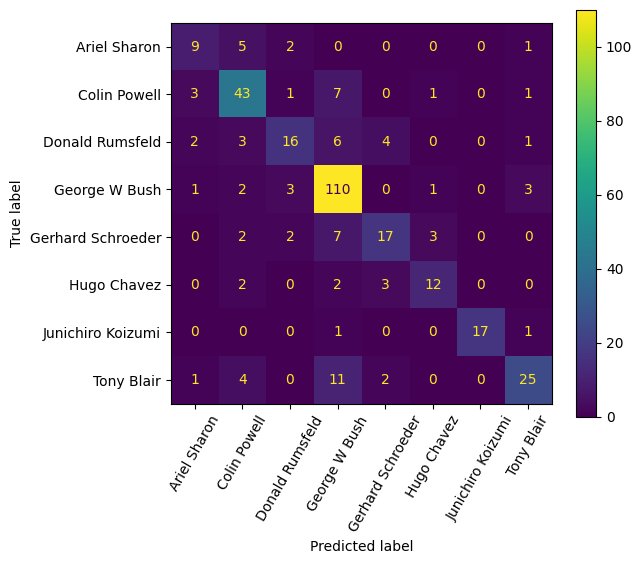

In [8]:
print(classification_report(y_test, y_pred, target_names=target_names))

cm= confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_names)
disp.plot()
plt.tight_layout()
plt.xticks(rotation=60)
plt.show()

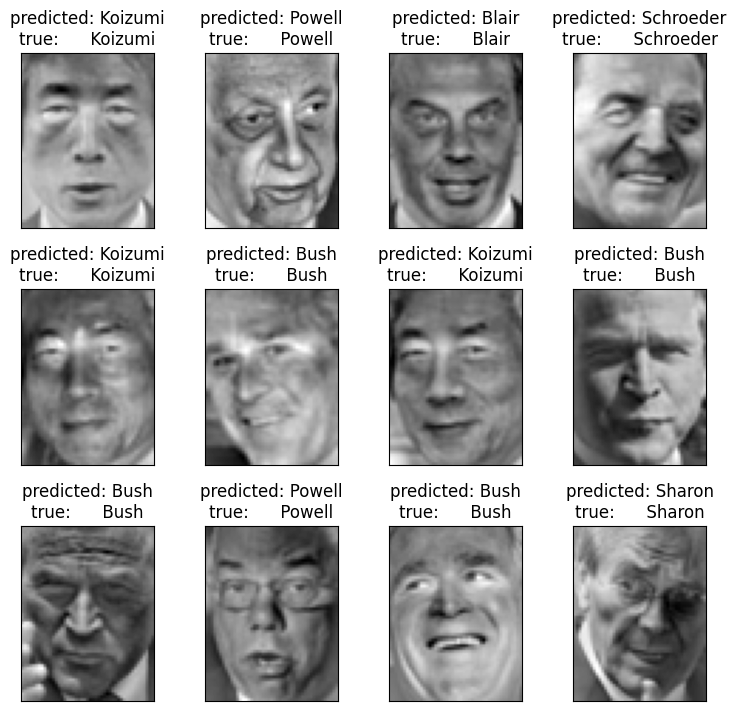

In [9]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name= target_names[int(y_pred[i])].rsplit(" ", 1)[-1]
    true_name= target_names[int(y_pred[i])].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

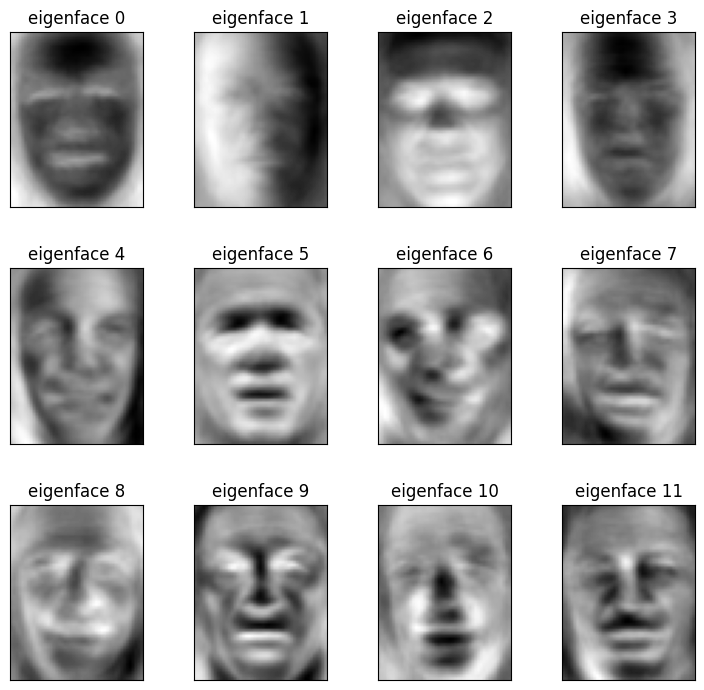

In [10]:
eigenfaces= pca.components_.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()